In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


This business analysis will talk about the data of the potential restaurants of United States and we'll talk about their potential.

Let's start with installing our features

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [6]:
potential_restaurants = pd.read_csv("../input/restaurant-business-rankings-2020/Future50.csv")

From the call above, we get this table.

In [7]:
potential_restaurants.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


Restaurant: Name of the restaurant
Location: Origin of the restaurant
Sales: Systemwide Sales ($000000)
YOY_Sales = Year-on-year sales increase in %
Units = Number of Premises
YOY_Units = year-on-year premises increase in %
Unit_Volume = Average Unit Volume ($000)

In [8]:
potential_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


From the info above we can see that all column has 50 rows and no null values between them, so we don't need to crate a data cleansing

### Unit Condition

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


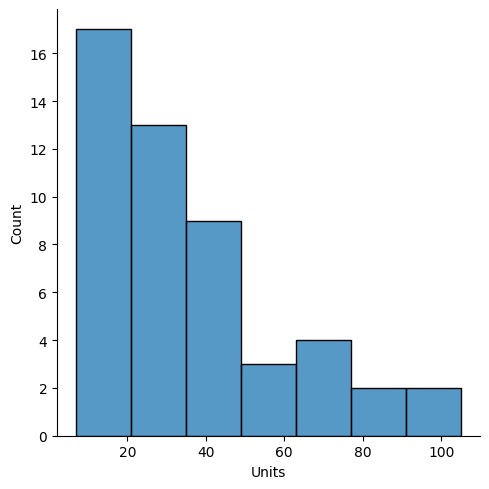

In [9]:
sns.displot(potential_restaurants['Units'])

Barchart above is a barchart that contain the number of units does every restaurant have. You can see that more than 50% samples has less than 50 units, while only 11 samples has more than 50 unit restaurants

In [22]:

# Filter for 'Franchising' == 'Yes' and get the top 10 by 'Units'
potential_units_yes = potential_restaurants[potential_restaurants['Franchising'] == 'Yes']
potential_units_yes = potential_units_yes.nlargest(n=10, columns='Units').sort_values('Units', ascending=False)
potential_units_yes = potential_units_yes[['Restaurant', 'Units', 'Franchising']]

# Filter for 'Franchising' == 'No' and get the top 10 by 'Units'
potential_units_no = potential_restaurants[potential_restaurants['Franchising'] == 'No']
potential_units_no = potential_units_no.nlargest(n=10, columns='Units').sort_values('Units', ascending=False)
potential_units_no = potential_units_no[['Restaurant', 'Units', 'Franchising']]

# Display the results
print("Top 10 Franchise Restaurant with largest unit number:")
print(potential_units_yes)
print("")
print("--------------------------")
print("\nTop 10 Non-Franchise Restaurant with largest unit number:")
print(potential_units_no)

Top 10 Franchise Restaurant with highest sales number:
                 Restaurant  Units Franchising
1               Clean Juice    105         Yes
41           The Human Bean     97         Yes
21              Duck Donuts     90         Yes
17           Vitality Bowls     77         Yes
5               Playa Bowls     76         Yes
16  Ike's Love & Sandwiches     71         Yes
23          Joe & The Juice     69         Yes
12         Teriyaki Madness     63         Yes
8                Creamistry     60         Yes
4                 Pokeworks     50         Yes

--------------------------

Top 10 Non-Franchise Restaurant highest sales number:
                    Restaurant  Units Franchising
13              Bluestone Lane     48          No
32  Jeni's Splendid Ice Creams     44          No
31                  Just Salad     38          No
26         Bibibop Asian Grill     37          No
46                      &pizza     35          No
0                   Evergreens     26        

From table above we can see that even restaurant with the highest number of unit, if they don't make it a franchise, they won't make it to the top 10 of restaurant with the most units

In [25]:
# Filter for 'Franchising' == 'Yes' and get the top 10 by 'Units'
potential_units_yes = potential_restaurants[potential_restaurants['Franchising'] == 'Yes']
potential_units_yes = potential_units_yes.nsmallest(n=10, columns='Units').sort_values('Units', ascending=False)
potential_units_yes = potential_units_yes[['Restaurant', 'Units', 'Franchising']]

# Display the results
print("Top 10 Franchise Restaurant with smallest unit number:")
print(potential_units_yes)

Top 10 Franchise Restaurant with smallest unit number:
                   Restaurant  Units Franchising
29            The Pizza Press     27         Yes
36            Famous Toastery     27         Yes
30             The Lost Cajun     26         Yes
34  Quickway Japanese Hibachi     25         Yes
45                LA Crawfish     25         Yes
2                    Slapfish     21         Yes
39    The Flying Biscuit Cafe     21         Yes
35                  Surcheros     20         Yes
7                   Melt Shop     19         Yes
43               Tacos 4 Life     16         Yes


Meanwhile, if you make your restaurant a franchise, even restaurant with the smallest number still able to reach the top 10 of the largest restaurant units with no franchise

In [11]:
franchise = potential_restaurants['Franchising'].value_counts().index
count = potential_restaurants['Franchising'].value_counts()

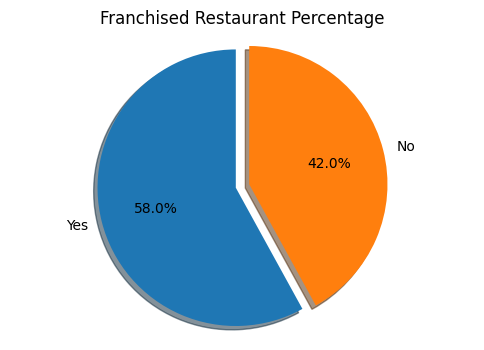

In [12]:
plt.figure(figsize = (6,4))
plt.pie(count, labels = franchise, explode = (0, 0.1), 
        autopct = '%.1f%%', shadow = True, startangle = 90)
plt.title('Franchised Restaurant Percentage')
plt.axis('equal')
plt.show()

### Sales

In [26]:
potential_sales_large = potential_restaurants.nlargest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
potential_sales_large[['Restaurant', 'Sales', 'Franchising']]

,Restaurant,Sales,Franchising
4,Pokeworks,49,Yes
40,Blue Sushi Sake Grill,49,No
13,Bluestone Lane,48,No
45,LA Crawfish,48,Yes
23,Joe & The Juice,47,Yes
41,The Human Bean,47,Yes
46,&pizza,45,No
1,Clean Juice,44,Yes
16,Ike's Love & Sandwiches,44,Yes
21,Duck Donuts,44,Yes


In [28]:
potential_sales_small = potential_restaurants.nsmallest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
potential_sales_small[['Restaurant', 'Sales', 'Franchising']]

,Restaurant,Sales,Franchising
0,Evergreens,24,No
22,The Little Beet,23,No
18,Hawkers Asian Street Fare,22,No
34,Quickway Japanese Hibachi,22,Yes
35,Surcheros,22,Yes
2,Slapfish,21,Yes
14,Original ChopShop,21,No
7,Melt Shop,20,Yes
30,The Lost Cajun,20,Yes
37,Culinary Dropout,20,No


From both tables, we can see that franchise creates not much effect on sales number. Even though, we can see that only three non-franchise restaurant made it to the top 10, while there are 5 non-franchise restaurants at the bottom 10. So, we can conclude that the sales number of non-franchise restaurant is slightly lower than the franchise restaurant.

### b. Top 10 Growth

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


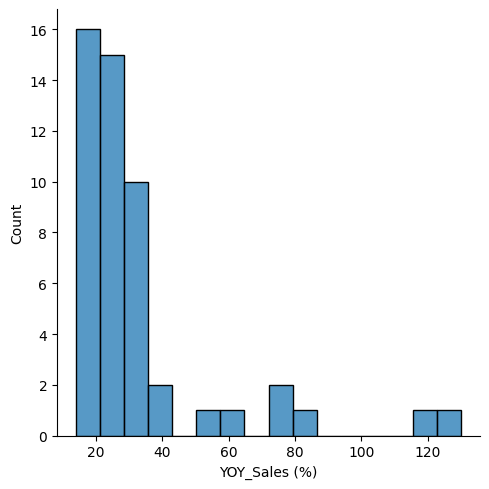

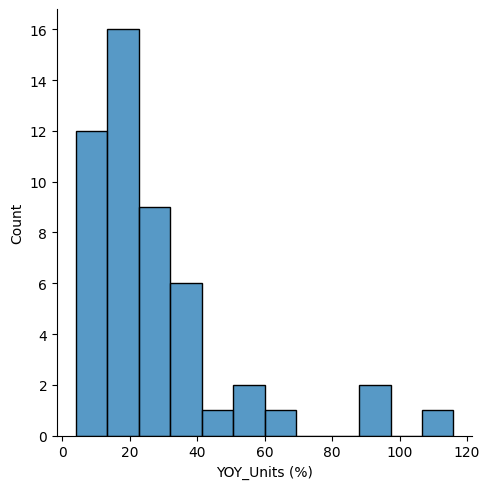

In [15]:
potential_restaurants['YOY_Sales (%)'] = potential_restaurants['YOY_Sales'].apply(lambda x: int(float(x.strip('%'))))
potential_restaurants['YOY_Units (%)'] = potential_restaurants['YOY_Units'].apply(lambda x: int(float(x.strip('%'))))

sns.displot(potential_restaurants['YOY_Sales (%)'])
sns.displot(potential_restaurants['YOY_Units (%)'])

From the graph we can see that most of the YOY Sales and YOY Units percentage of every sample are below 40.

In [16]:
potential_growth_sales_large = potential_restaurants.nlargest(n = 10, columns = 'YOY_Sales (%)').sort_values('YOY_Sales (%)', ascending = False)
potential_growth_sales_large[['Restaurant', 'Sales', 'YOY_Sales (%)', 'Franchising']]

,Restaurant,Sales,YOY_Sales (%),Franchising
0,Evergreens,24,130,No
1,Clean Juice,44,121,Yes
2,Slapfish,21,81,Yes
3,Clean Eatz,25,79,Yes
4,Pokeworks,49,77,Yes
5,Playa Bowls,39,62,Yes
6,The Simple Greek,24,52,Yes
7,Melt Shop,20,39,Yes
8,Creamistry,24,36,Yes
9,Joella's Hot Chicken,29,35,No


In [17]:
potential_growth_units_large = potential_restaurants.nlargest(n = 10, columns = 'YOY_Units (%)').sort_values('YOY_Units (%)', ascending = False)
potential_growth_units_large[['Restaurant', 'Units', 'YOY_Units (%)', 'Franchising']]

,Restaurant,Units,YOY_Units (%),Franchising
0,Evergreens,26,116,No
1,Clean Juice,105,94,Yes
2,Slapfish,21,90,Yes
12,Teriyaki Madness,63,65,Yes
3,Clean Eatz,46,58,Yes
4,Pokeworks,50,56,Yes
11,Dog Haus,50,42,Yes
18,Hawkers Asian Street Fare,7,40,No
13,Bluestone Lane,48,37,No
10,Eggs Up Grill,41,36,Yes


# Searching for average volume sold per units

In [18]:
# Figure out the average price by dividing total sales and total meals served
volume_per_units = (potential_restaurants['Unit_Volume']/potential_restaurants['Units']).round(2)
potential_restaurants['Average Volume per Units'] = volume_per_units
potential_restaurants.sort_values(by='Average Volume per Units', ascending=False).head(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,YOY_Sales (%),YOY_Units (%),Average Volume per Units
33,34,Boqueria,"New York, N.Y.",27,22.0%,7,16.7%,4260,No,22,16,608.57
18,19,Hawkers Asian Street Fare,"Orlando, Fla.",22,30.0%,7,40.0%,3800,No,30,40,542.86
20,21,Bulla Gastrobar,"Doral, Fla.",32,28.2%,8,14.3%,4300,No,28,14,537.50
37,38,Culinary Dropout,"Scottsdale, Ariz.",20,20.8%,7,16.7%,3120,No,20,16,445.71
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5%,14,16.7%,3500,No,19,16,250.00
42,43,Spitz Mediterranean Street Food,"Los Angeles, Calif.",28,18.8%,11,10.0%,2700,No,18,10,245.45
24,25,By Chloe,"New York, N.Y.",37,25.6%,14,7.7%,2800,No,25,7,200.00
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0%,13,8.3%,2550,No,16,8,196.15
25,26,Sugarfire Smokehouse,"Olivette, Mo.",39,25.4%,15,15.4%,2820,No,25,15,188.00
22,23,The Little Beet,"New York, N.Y.",23,26.5%,12,33.3%,2230,No,26,33,185.83


# Predicting restaurant with the most sales next year

In [19]:
# Figure out the average price by dividing total sales and total meals served
sales_next_year = (((potential_restaurants['YOY_Sales (%)'] / 100) * potential_restaurants['Sales']) + potential_restaurants['Sales']).round(2)
potential_restaurants['Sales Next Year'] = sales_next_year
potential_restaurants.sort_values(by='Sales Next Year', ascending=False).head(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,YOY_Sales (%),YOY_Units (%),Average Volume per Units,Sales Next Year
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,121,94,5.33,97.24
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,77,56,24.20,86.73
13,14,Bluestone Lane,"New York, N.Y.",48,33.0%,48,37.1%,1175,No,33,37,24.48,63.84
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes,62,28,7.63,63.18
23,24,Joe & The Juice,"New York, N.Y.",47,25.9%,69,25.5%,760,Yes,25,25,11.01,58.75
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5%,14,16.7%,3500,No,19,16,250.00,58.31
16,17,Ike's Love & Sandwiches,"San Francisco, Calif.",44,30.8%,71,29.1%,700,Yes,30,29,9.86,57.20
21,22,Duck Donuts,"Mechanicsburg, Pa.",44,28.0%,90,16.9%,530,Yes,28,16,5.89,56.32
45,46,LA Crawfish,"McAllen, Texas",48,17.6%,25,13.6%,2050,Yes,17,13,82.00,56.16
41,42,The Human Bean,"Medford, Ore.",47,19.0%,97,19.8%,535,Yes,19,19,5.52,55.93


# Predicting restaurant with the most units next year

In [20]:
# Figure out the average price by dividing total sales and total meals served
units_next_year = (((potential_restaurants['YOY_Units (%)'] / 100) * potential_restaurants['Units']) + potential_restaurants['Units']).round()
potential_restaurants['Units Next Year'] = units_next_year
potential_restaurants.sort_values(by='Units Next Year', ascending=False).head(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,YOY_Sales (%),YOY_Units (%),Average Volume per Units,Sales Next Year,Units Next Year
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,121,94,5.33,97.24,204.0
41,42,The Human Bean,"Medford, Ore.",47,19.0%,97,19.8%,535,Yes,19,19,5.52,55.93,115.0
21,22,Duck Donuts,"Mechanicsburg, Pa.",44,28.0%,90,16.9%,530,Yes,28,16,5.89,56.32,104.0
12,13,Teriyaki Madness,"Denver, Colo.",41,34.1%,63,65.8%,890,Yes,34,65,14.13,54.94,104.0
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes,62,28,7.63,63.18,97.0
17,18,Vitality Bowls,"San Ramon, Calif.",37,30.1%,77,24.2%,535,Yes,30,24,6.95,48.10,95.0
16,17,Ike's Love & Sandwiches,"San Francisco, Calif.",44,30.8%,71,29.1%,700,Yes,30,29,9.86,57.20,92.0
23,24,Joe & The Juice,"New York, N.Y.",47,25.9%,69,25.5%,760,Yes,25,25,11.01,58.75,86.0
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,77,56,24.20,86.73,78.0
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes,36,27,7.75,32.64,76.0


# Predicting restaurant with the highest volume/unit rate next year

In [21]:
# Figure out the average price by dividing total sales and total meals served
volume_rate_next_year = (potential_restaurants['Unit_Volume'] / potential_restaurants['Units Next Year']).round(2)
potential_restaurants['Volume Rate Next Year'] = volume_rate_next_year
potential_restaurants.sort_values(by='Volume Rate Next Year', ascending=False).head(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,YOY_Sales (%),YOY_Units (%),Average Volume per Units,Sales Next Year,Units Next Year,Volume Rate Next Year
33,34,Boqueria,"New York, N.Y.",27,22.0%,7,16.7%,4260,No,22,16,608.57,32.94,8.0,532.50
20,21,Bulla Gastrobar,"Doral, Fla.",32,28.2%,8,14.3%,4300,No,28,14,537.50,40.96,9.0,477.78
37,38,Culinary Dropout,"Scottsdale, Ariz.",20,20.8%,7,16.7%,3120,No,20,16,445.71,24.00,8.0,390.00
18,19,Hawkers Asian Street Fare,"Orlando, Fla.",22,30.0%,7,40.0%,3800,No,30,40,542.86,28.60,10.0,380.00
42,43,Spitz Mediterranean Street Food,"Los Angeles, Calif.",28,18.8%,11,10.0%,2700,No,18,10,245.45,33.04,12.0,225.00
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5%,14,16.7%,3500,No,19,16,250.00,58.31,16.0,218.75
24,25,By Chloe,"New York, N.Y.",37,25.6%,14,7.7%,2800,No,25,7,200.00,46.25,15.0,186.67
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0%,13,8.3%,2550,No,16,8,196.15,35.96,14.0,182.14
25,26,Sugarfire Smokehouse,"Olivette, Mo.",39,25.4%,15,15.4%,2820,No,25,15,188.00,48.75,17.0,165.88
38,39,Condado Tacos,"Columbus, Ohio",38,19.9%,15,15.4%,2755,No,19,15,183.67,45.22,17.0,162.06
